This is the notebook for image compression using a wavelet transform. This would be a little different from fourier as we would use the *pywavelets* package available for python. We would have  0.1,0.05,0.01  and  0.002  and that would enable us to see just exactly how much of the actual data we need to have a resoanble representation of the file.  As usual the first thing we do is import the required libraries.

In [10]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os #If you are reading images from a path, then you would need this. The image we need is in our directory so I am not using this
import pywt #This is the pywavelet package for wavelet decomposition
e

We are working with an image so it is good idea to display it as we want.

In [11]:
plt.rcParams['figure.figsize'] = [12, 8] # This is the size of the image 
plt.rcParams.update({'font.size': 18}) # This is the font size for any labels etc.

Now we import the image and allot the variable name  𝐴  to it.

In [15]:
A = imread('afghan_girl.jpg')

Now we need the grayscale image. The reason we do this is because of ease of representation. The RGB image has three layers whereas grayscale where each pixel is a shade of gray is a less cumbersome representation of the same data.

In [4]:
B= np.mean(A, -1)

**Wavelet Compression** is done with the pywavelets package and there are two arguments that need to be given. 
1. Number of levels for the multilevel decomposition. You can choose to not provide this and the subroutine would decide for you based on the *dwt_max_level * function.
2. Type of wavelet to be used. In this example we are using the *Daubechies wavelet* but you can play around with this.

In [5]:
## Wavelet Compression
n = 4
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

We sort our coefficient array just as we sorted the Fourier coefficients. 

In [6]:
Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

Now comes the crux of the process and it is not so surprisingly similar to the Fourier transform case. What we do is that we take a threshold value and below that value everything is made equal to zero in the transformed array(remember a grayscale image is an array). The numbers  0.1,0.05,0.01  and  0.002  that we associated with redundancy are now going to become the fractions of the array that we keep.

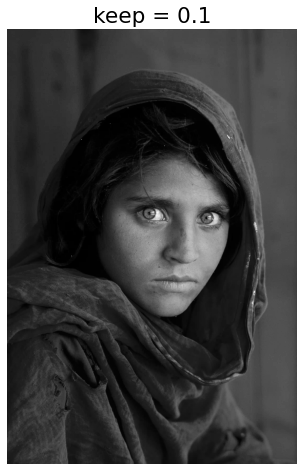

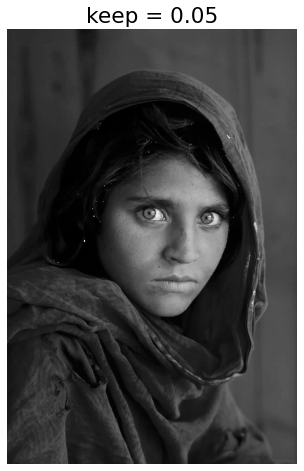

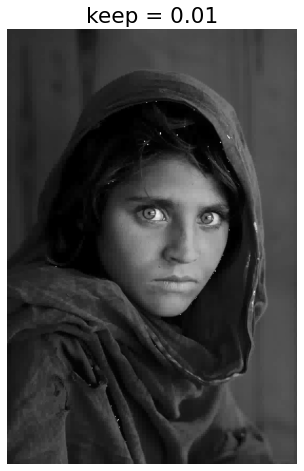

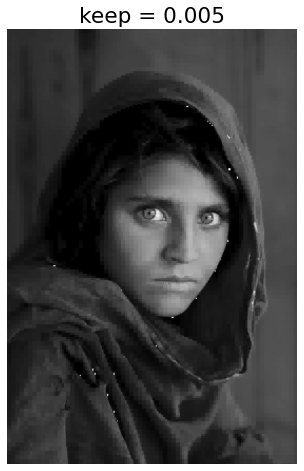

In [16]:
for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))


**Compare this with the performance of the Discrete Fourier Transform. Do you see a difference?**